<img src="https://brand.umich.edu/assets/brand/style-guide/logo-guidelines/U-M_Logo-Horizontal-Hex.png" alt="Drawing" style="width: 300px;" align="left"/><br>
    
## Week 1: Exploratory data analysis for learning analytics

In this week, you are familiarizing yourself with the Open University Learning Analytics Dataset (OULAD). The dataset contains the information about 22 courses, 32,593 students, their assessment results, and logs of their interactions with the Virtual Learning Environment (e.g., Moodle) represented by daily summaries of student clicks (10,655,280 entries). 

Go to the following link to learn more about the data, e.g., overall structure and variable definitions. Be sure to visit the site before you jump into analyzing the data. Student activity is captured across a variety of tables that correspond to data files you will have access to. As noted in the course and Week 1 introduction, we are using OU data as a test case for OIL’s efforts to build fully online courseware in the near future (The course design and database structure will be similar to what OIL develops). 

The basic task for this week is to get to know the data and understand variation in outcomes, i.e., pasing and dropout rates for each course (Part A). Once you have a sense of how outcomes vary across courses, it will be useful to operationally define and explore variation in the average number of clicks that students log per week (Part B). The commonsensical elements of course success come into play as you examine variation in students’ assessment performances (Part C).

**Reference**

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171

# Open University Learning Analytics (OULAD) dataset

Kuzilek, J., Hlosta, M., & Zdrahal, Z. (2017). Open university learning analytics dataset. Scientific data, 4, 170171. https://www.nature.com/articles/sdata2017171
## Data scheme
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig2_HTML.jpg)
## Course timeline
![](https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fsdata.2017.171/MediaObjects/41597_2017_Article_BFsdata2017171_Fig1_HTML.jpg)
## Relational database
* A module is a course
* A presentation is a semester (e.g., 2019J - Fall 2019, 2019B = Winter 2019)
* vle = virtual learning enviroment
![](https://analyse.kmi.open.ac.uk/resources/images/model.png)

---

## Part A (20 points)
Write a function that returns a pandas dataframe that consists of passing rate and dropout rate for each course.   
The output data frame should have 4 columns: code_module, code_presentation, pass_rate, dropout_rate 

Note:

$\text{dropout_rate} = \frac{\text{number of withdrawn}}{\text{number of enrollment}}$


$\text{pass_rate} = \frac{\text{number of pass or pass with distinction}}{\text{number of completed (i.e. did not withdraw)}}$

* Pass includes both pass and distinction (i.e., passing with honors)

In [1]:
import pandas as pd
import numpy as np
import math

### Testing code: 

Writing a function to test output: 

In [2]:
# Use studentInfo table: 
# contains student demographic information.
# final_result information 
# consists of 32,593 rows 

def answer_a_test():

    # View studentinfo: 
    df_stuinfo= pd.read_csv('assets/studentInfo.csv')

    # Build grouped table of student info: 
    df_stuinfo_grp= df_stuinfo.groupby(['code_module', 'code_presentation', 'final_result']).agg({'final_result': 'count'}).rename(columns = {'final_result': 'count_result'}).reset_index()

    # From grouped table: Count how many passed or had distinction: 
    df_passed = df_stuinfo_grp[(df_stuinfo_grp['final_result']=='Pass') | (df_stuinfo_grp['final_result']=='Distinction')].groupby(['code_module', 'code_presentation']).sum().rename(columns = {'count_result': 'passed_count'})

    # From grouped table: Count how many did not withdraw: 
    df_notwithdraw = df_stuinfo_grp[(df_stuinfo_grp['final_result']!='Withdrawn')].groupby(['code_module', 'code_presentation']).sum().rename(columns = {'count_result': 'notwithdraw_count'})

    # From grouped table: Count how many did withdraw:
    df_withdraw = df_stuinfo_grp[(df_stuinfo_grp['final_result']=='Withdrawn')].groupby(['code_module', 'code_presentation']).sum().rename(columns = {'count_result': 'withdraw_count'})

    # From grouped table: Count how many enrolled: These would be all students per course
    df_enrolled = df_stuinfo_grp[(df_stuinfo_grp['final_result'].notnull())].groupby(['code_module', 'code_presentation']).sum().rename(columns = {'count_result': 'enrolled_count'})



    # Now, we merge above dataframes one after the another: 
    df_merge = (df_passed.merge(right= df_notwithdraw, left_index= True, right_index= True)
                .merge(right = df_withdraw, left_index= True, right_index= True)
                .merge(right = df_enrolled, left_index= True, right_index= True))

    # Calculate drop out rate: 
    df_merge['dropout_rate'] =   df_merge['withdraw_count']/df_merge['enrolled_count']                    

    # Calculate rate:                        
    df_merge['pass_rate'] =   df_merge['passed_count']/df_merge['notwithdraw_count'] 

    # Collect result: 
    result = df_merge[['pass_rate', 'dropout_rate']].reset_index()

    return result


In [3]:
### Test output: 
len(answer_a_test())

22

### Implementing Code: 

In [4]:
"""The output data frame should have 4 columns: code_module, code_presentation, pass_rate, dropout_rate"""

import pandas as pd
import numpy as np

def answer_a():
    stdinfo = pd.read_csv('assets/studentInfo.csv')    
    
    # YOUR CODE HERE
    # Build grouped table of student info: 
    df_stuinfo_grp= stdinfo.groupby(['code_module', 'code_presentation', 'final_result']).agg({'final_result': 'count'}).rename(columns = {'final_result': 'count_result'}).reset_index()

    # From grouped table: Count how many passed or had distinction: 
    df_passed = df_stuinfo_grp[(df_stuinfo_grp['final_result']=='Pass') | (df_stuinfo_grp['final_result']=='Distinction')].groupby(['code_module', 'code_presentation']).sum().rename(columns = {'count_result': 'passed_count'})

    # From grouped table: Count how many did not withdraw: 
    df_notwithdraw = df_stuinfo_grp[(df_stuinfo_grp['final_result']!='Withdrawn')].groupby(['code_module', 'code_presentation']).sum().rename(columns = {'count_result': 'notwithdraw_count'})

    # From grouped table: Count how many did withdraw:
    df_withdraw = df_stuinfo_grp[(df_stuinfo_grp['final_result']=='Withdrawn')].groupby(['code_module', 'code_presentation']).sum().rename(columns = {'count_result': 'withdraw_count'})

    # From grouped table: Count how many enrolled: These would be all students per course
    df_enrolled = df_stuinfo_grp[(df_stuinfo_grp['final_result'].notnull())].groupby(['code_module', 'code_presentation']).sum().rename(columns = {'count_result': 'enrolled_count'})

    # Now, we merge above dataframes one after the another: 
    df_merge = (df_passed.merge(right= df_notwithdraw, left_index= True, right_index= True)
                .merge(right = df_withdraw, left_index= True, right_index= True)
                .merge(right = df_enrolled, left_index= True, right_index= True))

    # Calculate drop out rate: 
    df_merge['dropout_rate'] =   df_merge['withdraw_count']/df_merge['enrolled_count']                    

    # Calculate rate:                        
    df_merge['pass_rate'] =   df_merge['passed_count']/df_merge['notwithdraw_count'] 

    # Collect result: 
    result = df_merge[['pass_rate', 'dropout_rate']].reset_index()

    return result
    
    #raise NotImplementedError()
    
    
answer_a().head(5)

,code_module,code_presentation,pass_rate,dropout_rate
0,AAA,2013J,0.860681,0.156658
1,AAA,2014J,0.846154,0.180822
2,BBB,2013B,0.636292,0.285795
3,BBB,2013J,0.672944,0.287886
4,BBB,2014B,0.647373,0.303782


In [5]:
import pandas as pd
import numpy as np

# Check the number of courses
assert len(answer_a()) == 22

# Check the pass rate of AAA in 2013J
actual =  answer_a()[(answer_a()['code_module']=='AAA') &
                     (answer_a()['code_presentation']=='2013J')]['pass_rate'][0] 
desired = 0.860681
np.testing.assert_almost_equal(actual, desired, decimal=2, err_msg='', verbose=True)


<AxesSubplot:xlabel='pass_rate', ylabel='dropout_rate'>

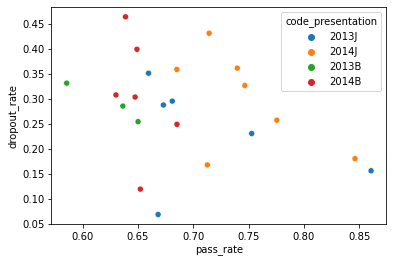

In [6]:
# let's visualize the courses by passrate and dropout rate
# Create a scatter plot
import seaborn as sns
sns.scatterplot(x="pass_rate", y="dropout_rate", data=answer_a(), hue="code_presentation")

---

## Part B (40 points)

Write a function that returns a pandas dataframe that consists of a weekly engagement metric, defined as the **average number of click per student** for each course.     
The output data frame should have 4 columns: **code_module, code_presentation, week, mean_click**.   
Use the following bin range to **convert date to week**. These are inclusive ranges.   
Hint: There are many ways to bin data, one of them is to use np.digitize and np.linspace. 


| date_bin 	| week 	|
|----------	|------	|
| ...      	| ...  	|
| [-14,-8] 	| -2   	|
| [-7,-1]  	| -1   	|
| [0,6]    	| 0    	|
| [7,13]   	| 1    	|
| [14,20]  	| 2    	|
| ...      	| ...  	|

### Testing code: 

Writing a function to test output:

In [7]:
# Use table studentVle: 
# contains student’s interactions with the VLE
# consists 10,655,280 rows

# Read data: 
stdvle = pd.read_csv('assets/studentVle.csv')

In [8]:
# Select columns we want to use: 
stdvle = stdvle[['code_module','code_presentation','id_student', 'date', 'sum_click']]


# Groupby by to get sum_clicks per date, student & course: 
stdvle_grp = stdvle.groupby(['code_module','code_presentation','id_student', 'date']).agg({'sum_click':'sum'}).reset_index()


# convert date to week value; create a new column: week
# stdvle_grp["week"] = np.floor(stdvle_grp["date"]/7)
stdvle_grp = stdvle_grp.assign(week = lambda x: x['date'].map(lambda d: math.floor(d/7)))


# Find sum of clicks over a week for each student
stdvle_week = stdvle_grp.groupby(['code_module','code_presentation','id_student', 'week']).agg({'sum_click':'sum'}).reset_index()


# Find sum of clicks for each week; sum clicks of all students for each course
stdvle_week_sum = stdvle_week.groupby(['code_module','code_presentation', 'week']).agg({'sum_click':'sum'}).reset_index()

# Find count of students per week
stdvle_count = stdvle_grp.groupby(['code_module','code_presentation', 'week']).agg({'id_student': 'nunique'}).rename(columns = {'id_student': 'count_students'}).reset_index()

# Merge count with weekly sum
stdvle_week_sum_count = stdvle_week_sum.merge(stdvle_count, on=["code_module", "code_presentation", 'week'])

# Find average clicks
stdvle_week_sum_count["mean_click"] = stdvle_week_sum_count["sum_click"]/stdvle_week_sum_count["count_students"]

In [9]:
stdvle_week_sum_count.head(5)

,code_module,code_presentation,week,sum_click,count_students,mean_click
0,AAA,2013J,-2,21100,301,70.099668
1,AAA,2013J,-1,28523,313,91.127796
2,AAA,2013J,0,33960,337,100.771513
3,AAA,2013J,1,38066,341,111.630499
4,AAA,2013J,2,44171,357,123.728291


In [10]:
"""The output data frame should have 4 columns: code_module, code_presentation, week, mean_click"""
import pandas as pd
import numpy as np

def answer_b():
    result = None
    
    # YOUR CODE HERE
    # Use table studentVle: 
    # contains student’s interactions with the VLE
    # consists 10,655,280 rows

    # Read data: 
    stdvle = pd.read_csv('assets/studentVle.csv')    
    
    # Select columns we want to use: 
    stdvle = stdvle[['code_module','code_presentation','id_student', 'date', 'sum_click']]


    # Groupby by to get sum_clicks per date, student & course: 
    stdvle_grp = stdvle.groupby(['code_module','code_presentation','id_student', 'date']).agg(
        {'sum_click':'sum'}).reset_index()


    # convert date to week value; create a new column: week
    # stdvle_grp["week"] = np.floor(stdvle_grp["date"]/7)
    stdvle_grp = stdvle_grp.assign(week = lambda x: x['date'].map(lambda d: math.floor(d/7)))


    # Find sum of clicks over a week for each student
    stdvle_week = stdvle_grp.groupby(['code_module','code_presentation','id_student', 'week']).agg(
        {'sum_click':'sum'}).reset_index()


    # Find sum of clicks for each week; sum clicks of all students for each course
    stdvle_week_sum = stdvle_week.groupby(['code_module','code_presentation', 'week']).agg(
        {'sum_click':'sum'}).reset_index()

    # Find count of students per week
    stdvle_count = stdvle_grp.groupby(['code_module','code_presentation', 'week']).agg(
        {'id_student': 'nunique'}).rename(columns = {'id_student': 'count_students'}).reset_index()

    # Merge count with weekly sum
    stdvle_week_sum_count = stdvle_week_sum.merge(stdvle_count, on=["code_module", "code_presentation", 'week'])

    # Find average clicks
    stdvle_week_sum_count["mean_click"] = stdvle_week_sum_count["sum_click"] / stdvle_week_sum_count["count_students"]    
    
    result = stdvle_week_sum_count[['code_module','code_presentation', 'week', 'mean_click']]
    return result


    #raise NotImplementedError()

answer_b()

,code_module,code_presentation,week,mean_click
0,AAA,2013J,-2,70.099668
1,AAA,2013J,-1,91.127796
2,AAA,2013J,0,100.771513
3,AAA,2013J,1,111.630499
4,AAA,2013J,2,123.728291
...,...,...,...,...
874,GGG,2014J,34,4.712500
875,GGG,2014J,35,4.657143
876,GGG,2014J,36,3.840580
877,GGG,2014J,37,3.838235


In [11]:
# Autograder tests

result_b = answer_b()

# Check the length of output
assert len(result_b) == 879

# Check the mean_click of AAA in 2013J week 1
actual =  result_b[(result_b['code_module']=='AAA') &
                     (result_b['code_presentation']=='2013J') &
                     (result_b['week']==0)]['mean_click'].values
desired = 100.771513
np.testing.assert_almost_equal(actual, desired, decimal=2)


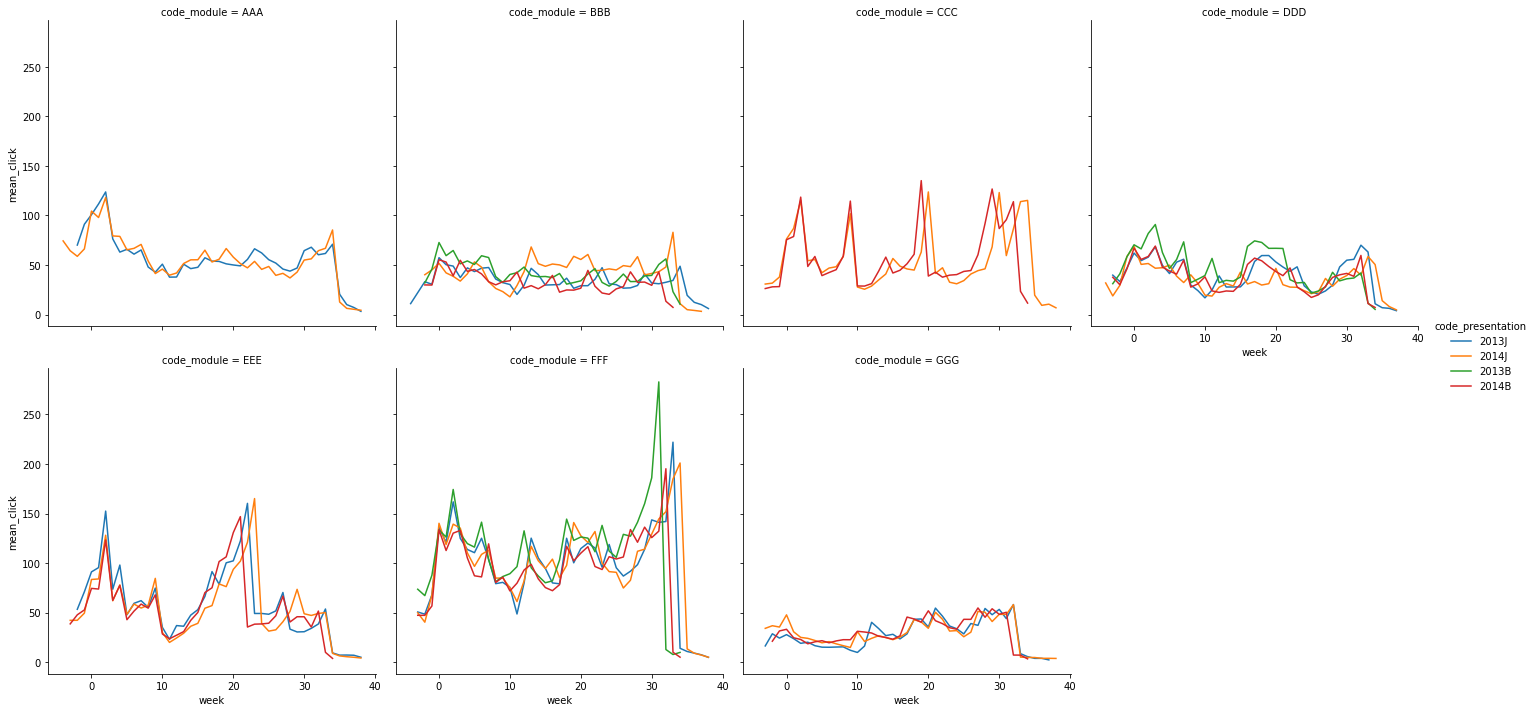

In [12]:
# Let's plot the result
import seaborn as sns
sns.relplot(data=result_b, x="week", y="mean_click", col="code_module",hue="code_presentation",
            kind="line", col_wrap=4)

---

## Part C (40 points)

Write a function that returns a pandas dataframe that consists of 6 columns: **code_module, code_presentation, id_assessment, submission_rate, pass_rate**.

$ submission\_rate_{i,t} = \frac{\text{submitted}_{i}}{\text{current enrollment}_t}$

The **submission rate** of assignment $i$ at deadline $t$ is defined as the **number of students who submitted the assignment** $i$, divided by the **number of enrollment** by the deadline $t$. Please note the the **number of enrollement** changes over time as students withdraw from the course.

Students are considered no longer enrolled in the course if their date_unregistration <= date (i.e. assignment deadline)

For example, course A in week 1 has 100 enrolled students, 90 submitted their week 1 assignment, submission rate week 1 = 90%
In week 2, 5 students dropped out, so the enrollment number is now 95. Out of 95 students, 85 submitted week 2 assignment, submission rate week 2 = 85/95 = 89.5%

**Passing_rate** is defined as the **number of students who submitted the assignment AND achieve a score >50** divided by the **number of students who submitted the assignment**.

$ pass\_rate = \frac{\text{submitted & score >50}}{\text{submitted}}$

Note: 
* Replace the missing values in the 'date' column in assessments.csv with 250
* Delete row where id_assessment == 40088 & 40087

### Testing code: 
Writing a function to test output:

In [13]:
assessments = pd.read_csv('assets/assessments.csv')
# Data cleaning
assessments["date"] = assessments["date"].fillna(250)
assessments = assessments[(assessments['id_assessment']!=40088) &
                          (assessments['id_assessment']!=40087)]
# Import student registration data
stdreg = pd.read_csv('assets/studentRegistration.csv')
# Import student grades
stdgrade = pd.read_csv('assets/studentAssessment.csv')

display(assessments.shape, assessments.head(), stdreg.shape, stdreg.head(), stdgrade.shape, stdgrade.head() )

(204, 6)

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


(32593, 5)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


(173912, 5)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [14]:
# Count number of students who submitted each assignment
std_submit_count = stdgrade.groupby(['id_assessment']).agg({'id_student':'count'}).rename(columns = {'id_student': 'count_submit'}).reset_index()

# Merge with assessments
ass_submit = assessments[["code_module","code_presentation","id_assessment", "date"]].merge(std_submit_count, on=['id_assessment'], how = 'left')

# Again Merge with studentRegistration
ass_std = ass_submit.merge(stdreg, on=["code_module","code_presentation"], how= 'left')

# Add a column called is_enrolled which says if the student was registered at the time of the assessment
def enroll(x):
    if x['date_registration'] <= x['date']:
        if math.isnan(x['date_unregistration']):
            return 1
        elif x['date'] < x['date_unregistration']:
            return 1
    
    return 0
    
ass_std["is_enrolled"] = ass_std.apply(enroll, axis=1)

ass_std

,code_module,code_presentation,id_assessment,date,count_submit,id_student,date_registration,date_unregistration,is_enrolled
0,AAA,2013J,1752,19.0,359.0,11391,-159.0,NaN,1
1,AAA,2013J,1752,19.0,359.0,28400,-53.0,NaN,1
2,AAA,2013J,1752,19.0,359.0,30268,-92.0,12.0,0
3,AAA,2013J,1752,19.0,359.0,31604,-52.0,NaN,1
4,AAA,2013J,1752,19.0,359.0,32885,-176.0,NaN,1
...,...,...,...,...,...,...,...,...,...
319486,GGG,2014J,37444,229.0,NaN,2640965,-4.0,NaN,1
319487,GGG,2014J,37444,229.0,NaN,2645731,-23.0,NaN,1
319488,GGG,2014J,37444,229.0,NaN,2648187,-129.0,NaN,1
319489,GGG,2014J,37444,229.0,NaN,2679821,-49.0,101.0,0


In [15]:
# fill nan values
#ass_std['count_submit'] = ass_std['count_submit'].fillna(0)

In [16]:
std_enroll_count = ass_std.groupby(["code_module","code_presentation", "id_assessment", "count_submit"], dropna=False).agg({'is_enrolled': 'sum'}).rename(columns = {'is_enrolled':'count_enrolled'}).reset_index()
std_enroll_count

,code_module,code_presentation,id_assessment,count_submit,count_enrolled
0,AAA,2013J,1752,359.0,370
1,AAA,2013J,1753,342.0,365
2,AAA,2013J,1754,331.0,353
3,AAA,2013J,1755,303.0,342
4,AAA,2013J,1756,298.0,328
...,...,...,...,...,...
199,GGG,2014J,37440,479.0,625
200,GGG,2014J,37441,473.0,625
201,GGG,2014J,37442,416.0,625
202,GGG,2014J,37443,344.0,625


In [17]:
# Count number of students who passed (score > 50) in each assignment
# Add a column 'pass' to indicate if the student passed in the assessment or not

def passed(x):
    return 1 if x['score'] > 50 else 0

stdgrade['pass'] = stdgrade.apply(passed, axis=1)


std_pass = stdgrade.groupby(['id_assessment']).agg({'pass': 'sum'}).reset_index()

# join with std_enroll_count
std_final = std_enroll_count.merge(std_pass, on=['id_assessment'], how = 'left')

# Submission rate
std_final['submission_rate'] = std_enroll_count['count_submit']/std_enroll_count['count_enrolled']

# Pass rate:
std_final['pass_rate'] = std_final['pass']/std_final['count_submit']

result = std_final[['code_module', 'code_presentation', 'id_assessment', 'submission_rate', 'pass_rate']]
result

,code_module,code_presentation,id_assessment,submission_rate,pass_rate
0,AAA,2013J,1752,0.970270,0.949861
1,AAA,2013J,1753,0.936986,0.903509
2,AAA,2013J,1754,0.937677,0.927492
3,AAA,2013J,1755,0.885965,0.920792
4,AAA,2013J,1756,0.908537,0.899329
...,...,...,...,...,...
199,GGG,2014J,37440,0.766400,0.937370
200,GGG,2014J,37441,0.756800,0.980973
201,GGG,2014J,37442,0.665600,0.860577
202,GGG,2014J,37443,0.550400,0.924419


### Implementing Code: 

In [18]:
"""The output data frame should have 6 columns: code_module, code_presentation, id_assessment, submission_rate, pass_rate"""
import pandas as pd
import numpy as np

def answer_c():
    # Import assessments.csv
    assessments = pd.read_csv('assets/assessments.csv')
    # Data cleaning
    assessments["date"] = assessments["date"].fillna(250)
    assessments = assessments[(assessments['id_assessment']!=40088) &
                              (assessments['id_assessment']!=40087)]
    # Import student registration data
    stdreg = pd.read_csv('assets/studentRegistration.csv')
    # Import student grades
    stdgrade = pd.read_csv('assets/studentAssessment.csv')
    
    # YOUR CODE HERE
    # Count number of students who submitted each assignment
    std_submit_count = stdgrade.groupby(['id_assessment']).agg({'id_student':'count'}).rename(columns = {'id_student': 'count_submit'}).reset_index()

    # Merge with assessments
    ass_submit = assessments[["code_module","code_presentation","id_assessment", "date"]].merge(std_submit_count, on=['id_assessment'], how = 'left')

    # Again Merge with studentRegistration
    ass_std = ass_submit.merge(stdreg, on=["code_module","code_presentation"], how = 'left')

    # Add a column called is_enrolled which says if the student was registered at the time of the assessment
    def enroll(x):
        if x['date_registration'] <= x['date']:
            if math.isnan(x['date_unregistration']):
                return 1
            elif x['date'] < x['date_unregistration']:
                return 1

        return 0

    # apply enroll function
    ass_std["is_enrolled"] = ass_std.apply(enroll, axis=1)
    
    # fill nan values with zero
    #ass_std['count_submit'] = ass_std['count_submit'].fillna(0)

    std_enroll_count = ass_std.groupby(["code_module","code_presentation", "id_assessment", "count_submit"], dropna=False).agg({'is_enrolled': 'sum'}).rename(columns = {'is_enrolled':'count_enrolled'}).reset_index()
    
    
    # Count number of students who passed (score > 50) in each assignment
    # Add a column 'pass' to indicate if the student passed in the assessment or not
    def passed(x):
        return 1 if x['score'] > 50 else 0

    stdgrade['pass'] = stdgrade.apply(passed, axis=1)


    std_pass = stdgrade.groupby(['id_assessment']).agg({'pass': 'sum'}).reset_index()

    # join with std_enroll_count
    std_final = std_enroll_count.merge(std_pass, on=['id_assessment'], how = 'left')

    std_final['submission_rate'] = std_enroll_count['count_submit']/std_enroll_count['count_enrolled']
    std_final['pass_rate'] = std_final['pass']/std_final['count_submit']

    result = std_final[['code_module', 'code_presentation', 'id_assessment', 'submission_rate', 'pass_rate']]
    

    #raise NotImplementedError()
    return result
answer_c()

,code_module,code_presentation,id_assessment,submission_rate,pass_rate
0,AAA,2013J,1752,0.970270,0.949861
1,AAA,2013J,1753,0.936986,0.903509
2,AAA,2013J,1754,0.937677,0.927492
3,AAA,2013J,1755,0.885965,0.920792
4,AAA,2013J,1756,0.908537,0.899329
...,...,...,...,...,...
199,GGG,2014J,37440,0.766400,0.937370
200,GGG,2014J,37441,0.756800,0.980973
201,GGG,2014J,37442,0.665600,0.860577
202,GGG,2014J,37443,0.550400,0.924419


In [19]:
import pandas as pd
import numpy as np

result_c = answer_c()

# Check the length of output
assert len(result_c) == 204

# Check the submission rate of AAA in 2013J id_assessment==1756
actual =  result_c[(result_c['code_module']=='AAA') &
                     (result_c['code_presentation']=='2013J') &
                     (result_c['id_assessment']==1756)]['submission_rate'].values
desired = 0.908537
np.testing.assert_almost_equal(actual, desired, decimal=2)

# Check the pass rate of AAA in 2013J id_assessment==1756
actual =  result_c[(result_c['code_module']=='AAA') &
                     (result_c['code_presentation']=='2013J') &
                     (result_c['id_assessment']==1756)]['pass_rate'].values
desired = 0.899329
np.testing.assert_almost_equal(actual, desired, decimal=2)
